In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [55]:
breast = pd.read_csv("data.csv") # Veri setini 'data.csv' dosyasından yükleyelim
df = breast.copy() # Yüklenen verileri bir kopyasına atayalım, böylece orijinal veri değişmeden kalır
df.head().T
# İlk birkaç satırı göstererek verinin yapısını gözlemleyelim
# .T fonksiyonu, verilerin transpoze edilmesini sağlar; böylece sütun adları satırlarda gösterilir

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [56]:
target_var = df['diagnosis']

# Bağımlı değişkeni (target_var) 'diagnosis' sütunundan alalım
# 'diagnosis', göğüs kanseri sınıflandırma probleminin hedef değişkenidir.

In [57]:
predictor_var = df.drop(['diagnosis','id'], axis=1)
# 'diagnosis' ve 'id' sütunlarını kaldırarak bağımsız değişkenler veri çerçevesini oluşturuyoruz
# 'diagnosis', hedef değişken olduğundan bağımsız değişkenler setinden çıkarılır.
# 'id' sütunu, benzersiz kimlik numaraları içerir ve model eğitiminde kullanılmaz, bu yüzden çıkarılır.

predictor_var.drop(columns=['Unnamed: 32'], inplace=True)
# 'Unnamed: 32' sütununu kaldırıyoruz
# Bu sütun genellikle veri setlerinde gereksiz veya boş olan sütunlardan biridir.
# 'inplace=True' parametresi, değişikliklerin mevcut veri çerçevesinde yapılmasını sağlar.

In [58]:

# Bağımsız değişkenler (predictor_var) ve bağımlı değişkenleri (target_var) eğitim ve test setlerine böleriz
# test_size=0.25, verinin %25'ini test seti olarak ayırır. random_state=42, sonuçların tekrar edilebilir olmasını sağlar.
pre_train, pre_test, target_train, target_test = train_test_split(predictor_var,  # Bağımsız değişkenler veri çerçevesi
                                                    target_var,  # Bağımlı değişkenler (hedef) veri serisi
                                                    test_size=0.25,   # Test setinin oranı
                                                    random_state=42)  # Tekrar edilebilirlik için rastgelelik kontrolü

# Eğitim seti ve test setinin boyutlarını yazdırarak bölme işleminin başarılı olup olmadığını kontrol edelim
print('pre_train', pre_train.shape)

print('target_train', target_train.shape)

print('pre_test', pre_test.shape)

print('target_test', target_test.shape)

# Veri çerçevesinin bir kopyasını alıyoruz
# Bu kopya, orijinal veri setinin bozulmadan kalmasını sağlar ve farklı analizler için kullanılabilir
training = df.copy()

print('training', training.shape)

pre_train (426, 30)
target_train (426,)
pre_test (143, 30)
target_test (143,)
training (569, 33)


In [59]:
# Lojistik Regresyon modelini oluşturuyoruz
# 'solver="liblinear"', küçük veri setleri ve l1 ceza terimi için uygun olan bir çözümleyici kullanır.
# 'liblinear', hem l1 hem de l2 ceza terimleriyle iyi performans sağlar ve küçük veri setlerinde hızlıdır.
loj = LogisticRegression(solver="liblinear")

In [60]:
# Lojistik Regresyon modelini eğitim verileri ile eğitiyoruz
# fit() fonksiyonu, modelin eğitim verileri üzerinde öğrenmesini sağlar
# pre_train: Eğitim verisinin bağımsız değişkenleri
# target_train: Eğitim verisinin bağımlı değişkenleri (hedef)
model = loj.fit(pre_train, target_train)

In [61]:
# Eğitimli model ile test verileri üzerinde tahminler yapıyoruz
# predict() fonksiyonu, eğitimli modelin bağımsız değişkenler (pre_test) kullanarak tahminlerde bulunmasını sağlar
# pred, modelin test verileri üzerindeki tahmin sonuçlarını içeren bir dizi olacaktır
pred = model.predict(pre_test)

In [62]:
# Model doğruluk hesaplama
acc_score = accuracy_score(target_test, pred)
# Modelin test verileri üzerindeki doğruluğunu hesaplıyoruz
# accuracy_score() fonksiyonu, gerçek hedef değişkenler (target_test) ile model tahminlerini (pred) karşılaştırarak doğruluğu hesaplar
# Doğruluk, modelin doğru tahminlerinin toplam tahminlere oranını temsil eder
print("Doğruluk: ", acc_score)

# Sınıflandırma raporunu gösterme
report = classification_report(target_test, pred)
# Modelin performansını detaylı olarak değerlendiriyoruz
# classification_report() fonksiyonu, precision, recall, f1-score gibi çeşitli metrikleri içerir ve her sınıf için bu metrikleri hesaplar
# Bu rapor, modelin sınıflandırma performansını kapsamlı bir şekilde gösterir
print("Sınıflandırma raporu:\n", report)

Doğruluk:  0.958041958041958
Sınıflandırma raporu:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [70]:
# Hiperparametreler ızgarası
# GridSearchCV, bu hiperparametreler arasından en iyi kombinasyonu bulmak için bu ızgarayı kullanacaktır
param_grid = {
    'n_estimators': [50, 100, 200],   # Random Forest modelindeki ağaç sayısı
    'max_depth': [None, 10, 20, 30],    # Her bir ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],    # Bir iç düğümün bölünmesi için gerekli minimum örnek sayısı
    'max_features': ['auto', 'sqrt', 'log2']    # Her bölünme için kullanılacak maksimum özellik sayısı
}


In [64]:
# Model
model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#cv (Cross-Validation): Bu örnekte cv=5 kullanarak 5 katlı çapraz doğrulama yapıyorsunuz. Bu, modelinizin genel performansını değerlendirmek için veriyi 5 katmana böler.
#n_jobs=-1: Bu parametre, Grid Search işleminin tüm işlemci çekirdeklerini kullanarak paralel çalışmasını sağlar ve böylece işlemi hızlandırabilir.
#verbose=2: Bu, işlem sırasında daha fazla ayrıntı gösterir ve işlemin ilerlemesini görmenizi sağlar.
grid_search.fit(pre_train, target_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_cons

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [65]:
# En iyi hiperparametreler
print("En iyi hiperparametreler:", grid_search.best_params_)

# En iyi model
best_model = grid_search.best_estimator_

# Test seti ile performans değerlendirme
y_pred = best_model.predict(pre_test)
print("Doğruluk:", accuracy_score(target_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(target_test, y_pred))


En iyi hiperparametreler: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Doğruluk: 0.972027972027972
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [66]:
# En iyi model
best_model = grid_search.best_estimator_

# Test seti ile tahmin yapma
y_pred = best_model.predict(pre_test)

# Doğruluk
print("Doğruluk:", accuracy_score(target_test, y_pred))

Doğruluk: 0.972027972027972


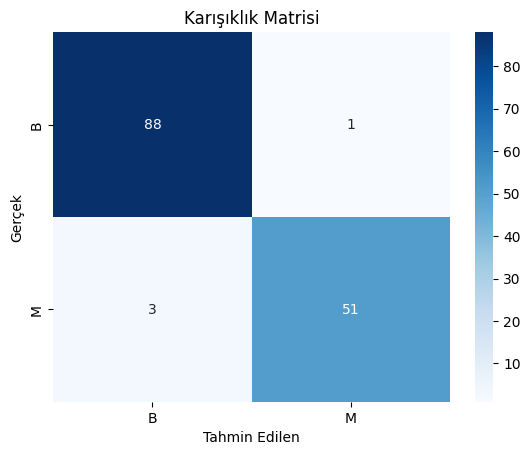

In [67]:
cm = confusion_matrix(target_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

In [68]:
import joblib

# Modeli kaydetme
joblib.dump(best_model, 'random_forest_model.pkl')

# Modeli yükleme
loaded_model = joblib.load('random_forest_model.pkl')